<a href="https://colab.research.google.com/github/m22ai663/Fractal3AssignemntP2/blob/main/Problem_2_Learning_to_implement_Neural_Network_Gurmukhi_Handwritten_Digit_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSL7020: Machine Learning-1
# Semester II, 2022-202
# Fractal-3 Assignment

---

*  #### Name: Bijesh P V
*  #### ID: M22Ai663
*  #### M.Tech DCS Exceutive Batch 2022-24

---
Code Link : https://colab.research.google.com/drive/1wkH5xjZq_9DqyV9PzjqantoKgcv6-awV?usp=sharing

Learning to implement Neural Network [30
points]
1. Gurmukhi Handwritten Digit Classification: Gurmukhi is one of the popular
Indian scripts widely used in Indian state of Punjab. In this part of the assignment,
our goal is to develop a neural network solution (a simple NN, not a CNN) for classifying
Gurmukhi digits. We provide you Handwritten Gurmukhi digit dataset here:


Modify the code provided in here and a video tutorial here, and develop a robust
neural network to classify the Gurmukhi digits. Higher performance on test set will
have bonus point. Briefly write your observation and submit your code so that we can
evaluate your implementation at our end.

Steps done 
1. The necessary libraries are imported, including TensorFlow, Keras, Pandas, and cv2.
2. The user is authenticated and the Google Drive is mounted.
3. The data path is set and a function is defined to load the data from the path, resize the images, and convert them to NumPy arrays.
4. The load_data() function is called to load the training and testing data.
5. The training and testing data are tested to make sure they are loaded correctly.
6. A simple neural network model is defined with one input layer and one output layer.
7. The model is compiled with an optimizer, loss function, and metrics.
8. The model is trained on the training data for a specified number of epochs.
9. The performance of the model is evaluated on the testing data.
10. Finally, three images from the testing data are displayed using Matplotlib.

In [36]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import cv2
from keras.layers import Dense, Flatten
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate user
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Set data path
data_path = '/content/drive/My Drive/Classes/CSL7020 Machine Learning-1/Fractal-3 Assignment/Problem 2/data/'

def load_data(data_path):
    # Set the image size
    img_size = (32, 32)
    # Create empty lists for the images and labels
    images_train = []
    labels_train = []
    images_test = []
    labels_test = []
    # Loop over each folder from '0' to '9' for training data
    for label in range(10):
        folder_path = os.path.join(data_path, 'train', str(label))
        # Loop over each image in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file_path.endswith(('.tiff','.bmp')):
                # Load the image and resize it to the desired size
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                # Append the image and label to the lists
                images_train.append(img)
                labels_train.append(label)
    # Loop over each folder from '0' to '9' for testing data
    for label in range(10):
        folder_path = os.path.join(data_path, 'val', str(label))
        # Loop over each image in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file_path.endswith(('.tiff','.bmp')):
                # Load the image and resize it to the desired size
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                # Append the image and label to the lists
                images_test.append(img)
                labels_test.append(label)
    # Convert the lists to NumPy arrays
    images_train = np.array(images_train)
    labels_train = np.array(labels_train)
    images_test = np.array(images_test)
    labels_test = np.array(labels_test)
    
    # Load the dataset
    x_train = np.load('x_train.npy')
    y_train = np.load('y_train.npy')
    x_test = np.load('x_test.npy')
    y_test = np.load('y_test.npy')
    # Return the train and test datasets
    return images_train, labels_train, images_test, labels_test

images_train, labels_train, images_test, labels_test = load_data(data_path)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


1000
178
(1000, 32, 32)
(178, 32, 32)


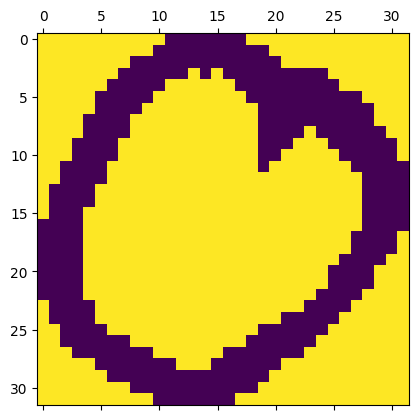

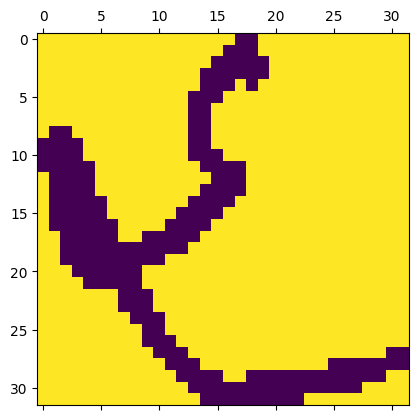

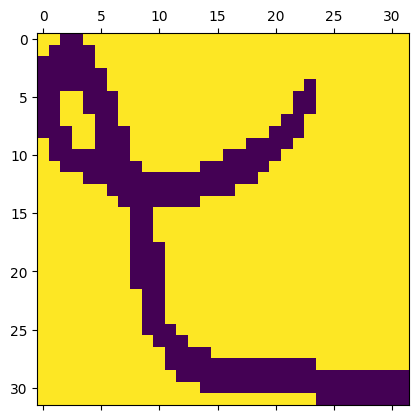

In [37]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

Length of x_train: 1000
Length of x_test: 178
Shape of x_train[0]: (32, 32)


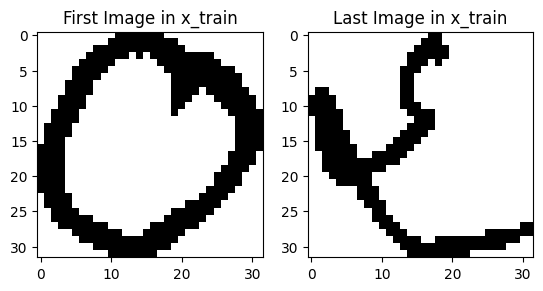

Shape of x_train: (1000, 32, 32)
Shape of x_test: (178, 32, 32)
y_train: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 

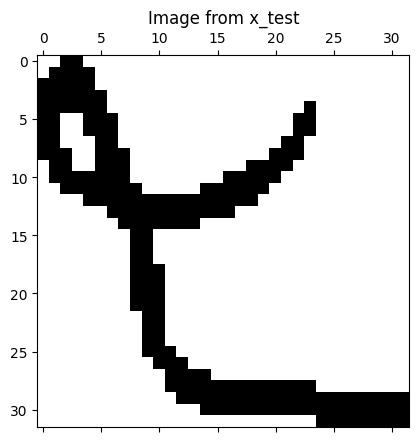

In [38]:
print("Length of x_train:", len(x_train))
print("Length of x_test:", len(x_test))
print("Shape of x_train[0]:", x_train[0].shape)

# Display the first and last images in x_train
fig, axs = plt.subplots(1, 2)
axs[0].imshow(x_train[0], cmap='gray')
axs[0].set_title("First Image in x_train")
axs[1].imshow(x_train[-1], cmap='gray')
axs[1].set_title("Last Image in x_train")
plt.show()

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("y_train:", y_train)
print("y_test:", y_test)

# Display an image from x_test
plt.matshow(x_test[150], cmap='gray')
plt.title("Image from x_test")
plt.show()

In [39]:
# creating a simple nn
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(10, activation='sigmoid')
])

# compile the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 11ms/step - loss: 109.2211 - accuracy: 0.4730 - val_loss: 52.0988 - val_accuracy: 0.6292
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 24.5068 - accuracy: 0.8180 - val_loss: 38.8973 - val_accuracy: 0.7809
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 11.9078 - accuracy: 0.8910 - val_loss: 24.9428 - val_accuracy: 0.8483
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 8.2363 - accuracy: 0.9240 - val_loss: 31.4160 - val_accuracy: 0.7978
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 6.5473 - accuracy: 0.9320 - val_loss: 24.4974 - val_accuracy: 0.8764
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 5.2085 - accuracy: 0.9350 - val_loss: 24.4524 - val_accuracy: 0.8315
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 4.9133 - accuracy: 0.9450 - val_loss: 18.3578 - val_accuracy: 0.9157
Epoch 8/

In [41]:
# now scale and try to check the accuracy, divide dataset by 255.  Scaling the input data by dividing it by 255 is a common practice in deep learning as it brings the values of the pixels in the image to a range between 0 and 1, which can improve the performance of the neural network.
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))
model.evaluate(x_test_scaled,y_test)

Epoch 1/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6370 - accuracy: 0.9940 - val_loss: 0.8388 - val_accuracy: 0.9213
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.9940 - val_loss: 0.8322 - val_accuracy: 0.9213
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6222 - accuracy: 0.9940 - val_loss: 0.8254 - val_accuracy: 0.9270
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6151 - accuracy: 0.9930 - val_loss: 0.8190 - val_accuracy: 0.9213
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6081 - accuracy: 0.9940 - val_loss: 0.8123 - val_accuracy: 0.9213
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.9930 - val_loss: 0.8056 - val_accuracy: 0.9270
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5933 - accuracy: 0.9930 - val_loss: 0.7987 - val_accuracy: 0.9213
Epoch 8/10
32/32 [==

[0.7787091732025146, 0.9213483333587646]

6/6 [==============================] - 0s 2ms/step
Predicted value for image 1: 0
6/6 [==============================] - 0s 2ms/step
Predicted value for image 2: 0
6/6 [==============================] - 0s 2ms/step
Predicted value for image 3: 0


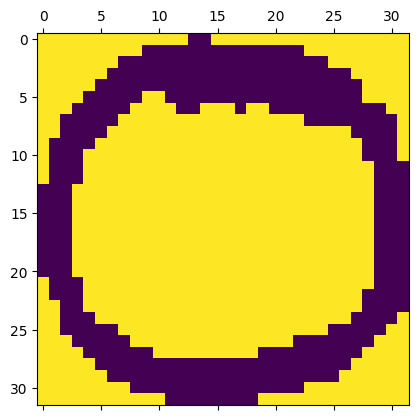

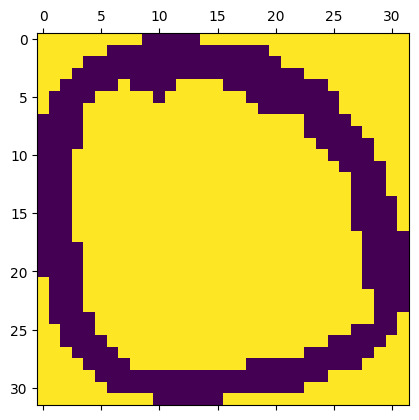

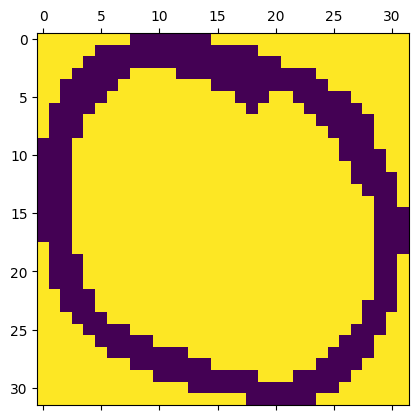

In [42]:
for i in range(3):
    plt.matshow(x_test[i])
    y_predicted = model.predict(x_test_scaled)
    predicted_value = np.argmax(y_predicted[i])
    print(f"Predicted value for image {i+1}: {predicted_value}")

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  4
Predicted Value is  9


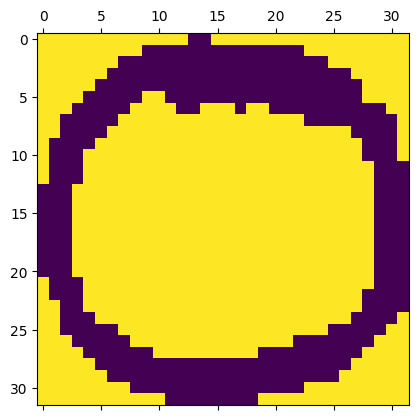

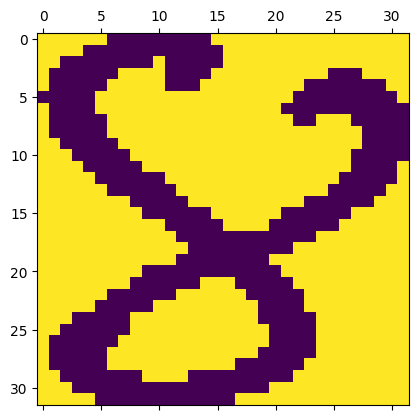

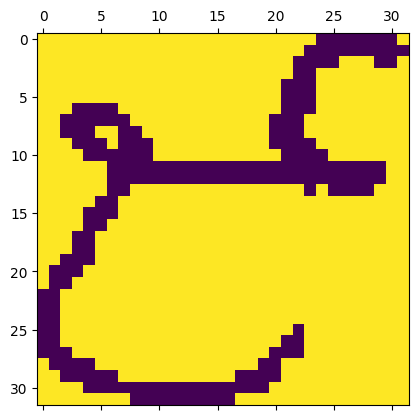

In [44]:
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
# this shows the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[80])
print('Predicted Value is ',np.argmax(y_predicted[80]))
plt.matshow(x_test[170])
print('Predicted Value is ',np.argmax(y_predicted[170]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 7, 1, 7, 7, 1, 1, 7, 1, 1, 1, 1, 7, 4, 2, 9, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


Text(95.72222222222221, 0.5, 'Actual')

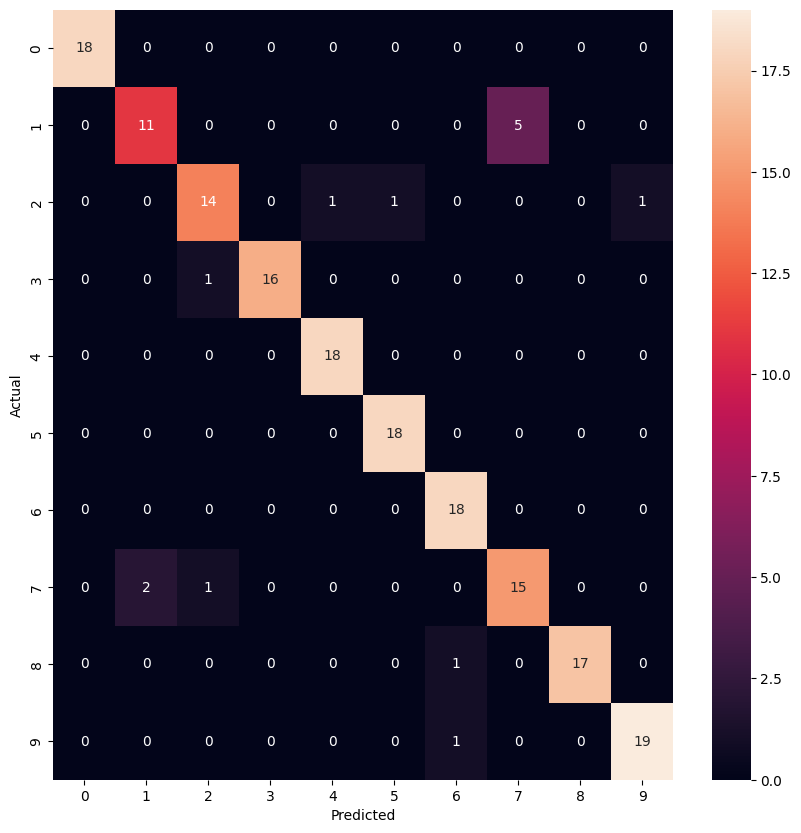

In [49]:
import seaborn as sn
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat
# Plot
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [50]:
# Define the model
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model2.fit(x_train_scaled, y_train,
                     epochs=10, 
                     validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 2s 22ms/step - loss: 0.9753 - accuracy: 0.7270 - val_loss: 0.3822 - val_accuracy: 0.8764
Epoch 2/10
32/32 [==============================] - 1s 17ms/step - loss: 0.1536 - accuracy: 0.9520 - val_loss: 0.3019 - val_accuracy: 0.8764
Epoch 3/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0953 - accuracy: 0.9630 - val_loss: 0.2399 - val_accuracy: 0.9213
Epoch 4/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0915 - accuracy: 0.9750 - val_loss: 0.4519 - val_accuracy: 0.8539
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0697 - accuracy: 0.9810 - val_loss: 0.2179 - val_accuracy: 0.9494
Epoch 6/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0262 - accuracy: 0.9940 - val_loss: 0.2064 - val_accuracy: 0.9551
Epoch 7/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.2239 - val_accuracy: 0.9326
Epoch 8/10
32

In [51]:
result = model2.evaluate(x_test_scaled, y_test)
print(f"Test loss: {result[0]:.4f}, Test accuracy: {result[1]*100:.2f}%")

6/6 [==============================] - 0s 5ms/step - loss: 0.1881 - accuracy: 0.9494
Test loss: 0.1881, Test accuracy: 94.94%
